Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Data

In [32]:
df = pd.read_csv('SurveyResults.csv')
df.head()

,response,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,1,school,NaN,NaN,NaN,NaN,NaN,2 - disagree,5 - Somewhat agree,2 - disagree,2 - disagree,2 - disagree,2 - disagree,2 - disagree,i find it simple and easy to use,NaN,NaN
1,2,school,NaN,Having to bring my phone and get distracted,auto detection of code across devices,Adding a fingerprint maybe,NaN,1 - Strongly disagree,1 - Strongly disagree,7 - Strongly agree,2 - disagree,7 - Strongly agree,5 - Somewhat agree,7 - Strongly agree,Nothing is confusing,The tone helps me locate my phone,NaN
2,3,work,NaN,Sometimes its slow. Also connecting multiple d...,Face ID instead of passcode,Face ID instead of passcode,NaN,1 - Strongly disagree,2 - disagree,6 - agree,2 - disagree,4 - Neither agree nor disagree,6 - agree,6 - agree,It's actually pretty sound. But I would say I'...,The interface isn't the best. Could be better ...,NaN
3,4,school,NaN,the increasing inflexibility of options to app...,NaN,not sure,NaN,2 - disagree,5 - Somewhat agree,4 - Neither agree nor disagree,3 - Somewhat disagree,7 - Strongly agree,7 - Strongly agree,7 - Strongly agree,NaN,NaN,NaN
4,5,work,NaN,na,na,na,NaN,3 - Somewhat disagree,5 - Somewhat agree,5 - Somewhat agree,1 - Strongly disagree,4 - Neither agree nor disagree,4 - Neither agree nor disagree,4 - Neither agree nor disagree,na,na,NaN


Remove unimportant columns, encode data.

In [33]:
relevantQuestions = ['Q7','Q8','Q9','Q10','Q11','Q12','Q13']
quantitativeResponses = df[relevantQuestions]
quantitativeResponses.head()

def encode(val: str) -> int:
    for key in range(0, 8):
            if str(key) in val:
                  return key
    raise Exception(F"failed to encode {val}") 

quantitativeResponses = quantitativeResponses.map(encode)
quantitativeResponses.head()

,Q7,Q8,Q9,Q10,Q11,Q12,Q13
0,2,5,2,2,2,2,2
1,1,1,7,2,7,5,7
2,1,2,6,2,4,6,6
3,2,5,4,3,7,7,7
4,3,5,5,1,4,4,4


Write a class to store results

In [34]:
class QuestionResult:
    def __init__(self):
        self.header = ''
        self.mean = 0
        self.stdDev = 0
    
    def __repr__(self):
        return f"{self.header}: {self.mean:.2f} ± {self.stdDev:.2f}"

In [35]:
results = []
for column in quantitativeResponses.columns:
    result = QuestionResult()
    result.header = column
    values = quantitativeResponses[column]
    result.mean = values.mean()
    result.stdDev = values.std()
    results.append(result)

print (results)
results.sort(key = lambda r: -r.mean)

print(results)


[Q7: 2.75 ± 1.52, Q8: 4.00 ± 1.81, Q9: 4.85 ± 1.84, Q10: 2.60 ± 1.19, Q11: 4.70 ± 1.84, Q12: 4.90 ± 1.37, Q13: 4.55 ± 1.85]
[Q12: 4.90 ± 1.37, Q9: 4.85 ± 1.84, Q11: 4.70 ± 1.84, Q13: 4.55 ± 1.85, Q8: 4.00 ± 1.81, Q7: 2.75 ± 1.52, Q10: 2.60 ± 1.19]


Chart the results

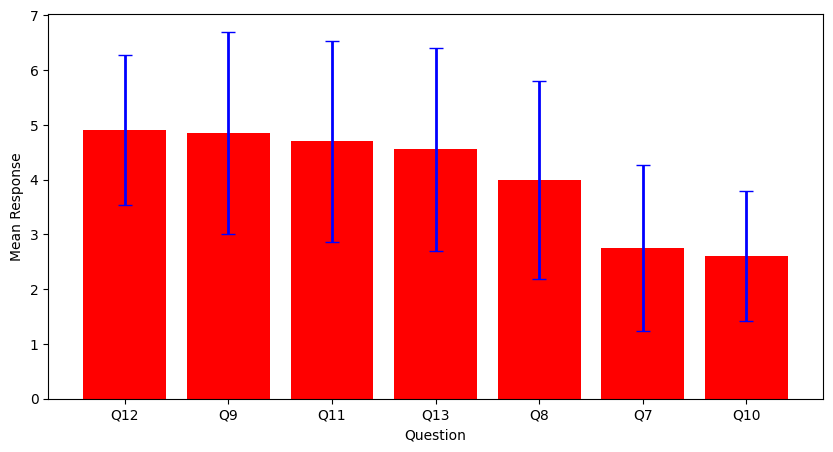

In [36]:


headers = [r.header for r in results]
means = [r.mean for r in results]
stdDev = [r.stdDev for r in results]

plt.figure(figsize=(10,5))
plt.bar(headers,means, yerr=stdDev, capsize=5, color = 'red', error_kw={'ecolor': 'blue', 'elinewidth': 2})
ax = plt.gca()
ax.set_xlabel('Question')
ax.set_ylabel('Mean Response')
plt.show()